Example regridding cloudsat measurements to a polar map projection

In [1]:
import pathlib
from datetime import datetime

import numpy as np
from numpy import ma
import xarray as xr
from scipy.stats import binned_statistic_2d, binned_statistic_dd
from pyproj import Proj
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs

from cloudsatipy import open_cloudsat

In [2]:
data_path = pathlib.Path("../../data/cloudsat/2c_ice")

In [3]:
date = datetime(2010, 9, 1)

In [4]:
ice_files = sorted(list((data_path / date.strftime("%Y") / date.strftime("%j")).glob("*.hdf")))

In [5]:
ice_files

[PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244003405_23106_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244021258_23107_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244035151_23108_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244053043_23109_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244070936_23110_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244084830_23111_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244102723_23112_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244120616_23113_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloudsat/2c_ice/2010/244/2010244134508_23114_CS_2C-ICE_GRANULE_P1_R05_E03_F00.hdf'),
 PosixPath('../../data/cloud

In [6]:
open_cloudsat(ice_files[0])

<xarray.Dataset> Size: 336MB
Dimensions:                     (Nray: 37081, Nbin: 125)
Coordinates:
    Profile_time                (Nray) datetime64[ns] 297kB 2010-09-01T00:34:...
    Latitude                    (Nray) float32 148kB -0.005942 ... 0.004495
    Longitude                   (Nray) float32 148kB 17.67 17.66 ... -7.053
    Height                      (Nray, Nbin) float32 19MB 2.487e+04 ... -4.70...
    UTC_start                   float64 8B 2.045e+03
    TAI_start                   float64 8B 5.575e+08
    Range_to_intercept          (Nray) float32 148kB 705.8 705.8 ... 705.7 705.7
    DEM_elevation               (Nray) float32 148kB 319.0 317.0 ... nan nan
    Vertical_binsize            float64 8B 239.8
    Pitch_offset                float64 8B 0.16
    Roll_offset                 float64 8B 0.0
Dimensions without coordinates: Nray, Nbin
Data variables: (12/28)
    Data_quality                (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Data_status                 (Nray) float32 148kB 2.1e+03 ... 4.148e+03
    Data_targetID               (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RayStatus_validity          (Nray) float32 148kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Navigation_land_sea_flag    (Nray) float32 148kB 1.0 1.0 1.0 ... 2.0 2.0 2.0
    Temperature                 (Nray, Nbin) float32 19MB 221.7 221.2 ... nan
    ...                          ...
    cc_ice_status               (Nray) float32 148kB 10.0 10.0 10.0 ... 0.0 0.0
    dBZe_simulation             (Nray, Nbin) float32 19MB nan nan ... nan nan
    TAB_simulation              (Nray, Nbin) float32 19MB 0.0 0.0 ... 0.0 0.0
    zone                        (Nray, Nbin) float64 37MB nan nan ... nan nan
    ze_makeup                   (Nray, Nbin) float32 19MB -88.88 ... 168.4
    tab_para                    (Nray, Nbin) float32 19MB 0.0 0.0 ... 0.0 0.0
Attributes:
    granule_number:     23106.0
    ID_MACHINE:         CSATLAS2
    ID_CREATED:         Wed Feb 27 12:19:41 2019
    algorithm_name:     2C-ICE
    algorithm_version:  P1_R05.0
    product_version:    P1_R05
    start_time:         20100901003405
    end_time:           20100901021257

In [7]:
ice_ds = xr.concat((open_cloudsat(f, variable=["IWC", "ice_water_path"]) for f in ice_files), "Nray")

In [8]:
ice_ds

<xarray.Dataset> Size: 581MB
Dimensions:             (Nray: 556218, Nbin: 125)
Coordinates:
    Profile_time        (Nray) datetime64[ns] 4MB 2010-09-01T00:34:05.0799560...
    Latitude            (Nray) float32 2MB -0.005942 -0.01561 ... 0.001183
    Longitude           (Nray) float32 2MB 17.67 17.66 17.66 ... 6.856 6.854
    Height              (Nray, Nbin) float32 278MB 2.487e+04 ... -4.884e+03
    UTC_start           (Nray) float64 4MB 2.045e+03 2.045e+03 ... 8.511e+04
    TAI_start           (Nray) float64 4MB 5.575e+08 5.575e+08 ... 5.575e+08
    Range_to_intercept  (Nray) float32 2MB 705.8 705.8 705.8 ... 705.8 705.8
    DEM_elevation       (Nray) float32 2MB 319.0 317.0 317.0 ... nan nan nan
    Vertical_binsize    float64 8B 239.8
    Pitch_offset        float64 8B 0.16
    Roll_offset         float64 8B 0.0
Dimensions without coordinates: Nray, Nbin
Data variables:
    IWC                 (Nray, Nbin) float32 278MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ice_water_path      (Nray) float32 2MB 21.17 23.94 32.15 ... 0.6751 1.045
Attributes:
    granule_number:     23106.0
    ID_MACHINE:         CSATLAS2
    ID_CREATED:         Wed Feb 27 12:19:41 2019
    algorithm_name:     2C-ICE
    algorithm_version:  P1_R05.0
    product_version:    P1_R05
    start_time:         20100901003405
    end_time:           20100901021257

Plot cloudsat orbits on a polar orthographic projection

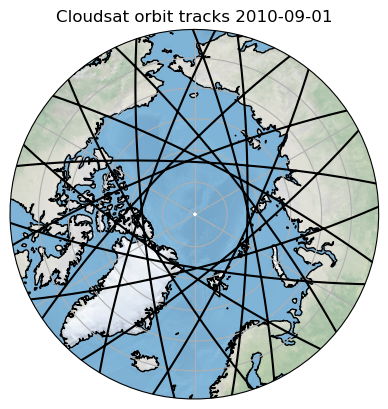

In [9]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.Orthographic(0, 90)})

ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.plot(ice_ds.Longitude, ice_ds.Latitude, "k-", transform=ccrs.Geodetic())
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree()) # Restrict to above 60N
ax.set_title(f'Cloudsat orbit tracks {date.strftime("%Y-%m-%d")}')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

Simple approach, transform lat/lon to orthographic projection and bin by grid

In [10]:
# Set up a projection
ortho_p = Proj("+proj=ortho +lat_0=90")

In [11]:
grid_limits = [ortho_p(lon, 60) for lon in [0, 90, 180, 270]]

In [12]:
grid_extent = [
    np.asarray(grid_limits).min(0)[0], 
    np.asarray(grid_limits).max(0)[0], 
    np.asarray(grid_limits).min(0)[1], 
    np.asarray(grid_limits).max(0)[1], 
]

In [13]:
grid_extent

[np.float64(-3197104.5869239476),
 np.float64(3197104.5869239476),
 np.float64(-3197104.5869239476),
 np.float64(3197104.5869239476)]

In [14]:
grid_resolution = 1e5 # 100km resolution grid

In [15]:
# round grid extent to resolution
grid_extent = list(map(lambda x: np.round(x / grid_resolution) * grid_resolution, grid_extent))

In [16]:
grid_extent

[np.float64(-3200000.0),
 np.float64(3200000.0),
 np.float64(-3200000.0),
 np.float64(3200000.0)]

Define bins for binned_statistic

In [17]:
x_bins = np.arange(grid_extent[0], grid_extent[1]+1, grid_resolution)
y_bins = np.arange(grid_extent[2], grid_extent[3]+1, grid_resolution)

Transform cloudsat lat/lon into projection coordinates

In [18]:
lats = ice_ds.Latitude.values
lons = ice_ds.Longitude.values

cloudsat_x, cloudsat_y = ortho_p(lons, lats)

# Some points will be outside of the projection (i.e. in the southern hemisphere), so we check for where the coordinates are finite
wh_valid = np.isfinite(cloudsat_x)

iwp = ice_ds.ice_water_path.values

Bin to defined grid

In [19]:
iwp_grid = binned_statistic_2d(
    cloudsat_y[wh_valid].ravel(),
    cloudsat_x[wh_valid].ravel(),
    iwp[wh_valid].ravel(),
    statistic=np.nanmean,
    bins=[y_bins, x_bins]
)

In [20]:
iwp_grid

BinnedStatistic2dResult(statistic=array([[1.44454193e+01, 1.88788585e-02,            nan, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [           nan, 4.78130960e+00, 5.30895813e+02, ...,
        0.00000000e+00,            nan,            nan],
       [           nan,            nan,            nan, ...,
        0.00000000e+00,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]]), x_edge=array([-3200000., -3100000., -3000000., -2900000., -2800000., -2700000.,
       -2600000., -2500000., -2400000., -2300000., -2200000., -2100000.,
       -2000000., -1900000., -1800000., -1700000., -1600000., -1500000.,
       -1400000., 

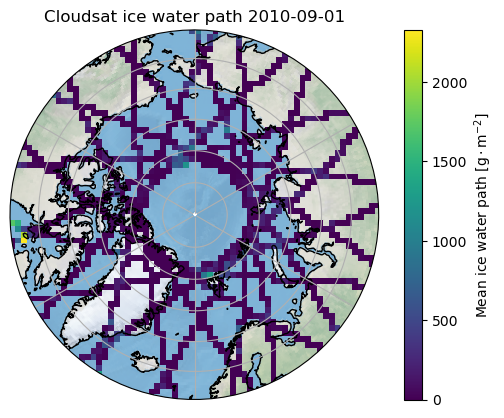

In [21]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.Orthographic(0, 90)})

ax.stock_img()
ax.coastlines()
ax.gridlines()
img = ax.imshow(iwp_grid.statistic, transform=ccrs.Orthographic(0, 90), extent=grid_extent, origin="lower")
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree()) # Restrict to above 60N
ax.set_title(f'Cloudsat ice water path {date.strftime("%Y-%m-%d")}')
plt.colorbar(img, label="Mean ice water path [$\mathrm{g} \cdot \mathrm{m}^{-2}$]")

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

Due to the limited spatial extent of the cloudsat data, only some grid locations have values

We can see how many points went into each grid location using np.histogram_2d

In [22]:
grid_points = np.histogram2d(
    cloudsat_y[wh_valid].ravel(),
    cloudsat_x[wh_valid].ravel(),
    bins=[y_bins, x_bins]
)

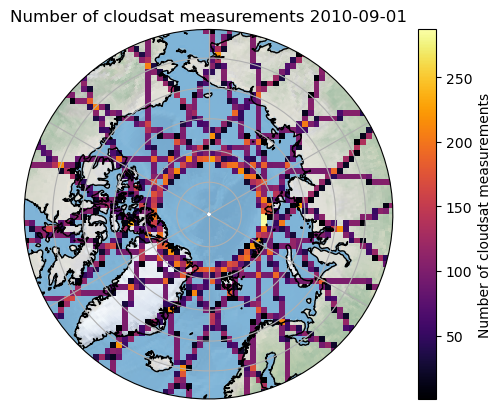

In [23]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection":ccrs.Orthographic(0, 90)})

ax.stock_img()
ax.coastlines()
ax.gridlines()
img = ax.imshow(
    ma.array(grid_points[0], mask=grid_points[0]<1), 
    transform=ccrs.Orthographic(0, 90), extent=grid_extent, origin="lower", cmap="inferno",
)
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree()) # Restrict to above 60N
ax.set_title(f'Number of cloudsat measurements {date.strftime("%Y-%m-%d")}')
plt.colorbar(img, label="Number of cloudsat measurements")

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

We have lots of measurements in a ring around the pole, which could allow interesting lifetime analysis of e.g. cold air outbreaks

3D regridding of IWC

In [24]:
height_bins = np.arange(0,2.5e4+1,500)

In [25]:
cloudsat_height = ice_ds.Height.values

cloudsat_xz = np.tile(cloudsat_x.reshape(-1, 1), [1, ice_ds.Nbin.size])
cloudsat_yz = np.tile(cloudsat_y.reshape(-1, 1), [1, ice_ds.Nbin.size])

iwc = ice_ds.IWC.values

In [26]:
iwc_grid = binned_statistic_dd(
    [cloudsat_height[wh_valid].ravel(), cloudsat_yz[wh_valid].ravel(), cloudsat_xz[wh_valid].ravel(),], 
    iwc[wh_valid].ravel(),
    statistic=np.nanmean,
    bins=[height_bins, y_bins, x_bins]
)

In [27]:
iwc_grid

BinnedStatisticddResult(statistic=array([[[ 0.,  0., nan, ...,  0.,  0., nan],
        [nan,  0.,  0., ...,  0., nan, nan],
        [nan, nan, nan, ...,  0., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0., nan, ...,  0.,  0., nan],
        [nan,  0.,  0., ...,  0., nan, nan],
        [nan, nan, nan, ...,  0., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0., nan, ...,  0.,  0., nan],
        [nan,  0.,  0., ...,  0., nan, nan],
        [nan, nan, nan, ...,  0., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 0.,  0., nan, ...,  0.,  0., nan],
        [nan,  0.,  0., ...,  0., nan, nan],
        

Plot the mean of a swath around 0/180 longitude

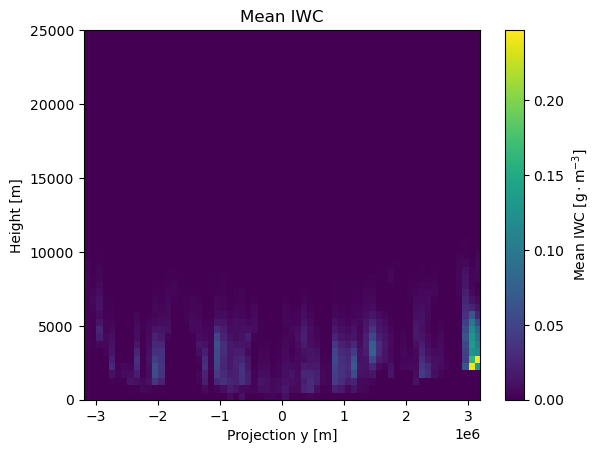

In [28]:
fig, ax = plt.subplots(1, 1)

img = ax.imshow(
    np.nanmean(iwc_grid.statistic[..., 22:42], -1), origin="lower", aspect="auto", 
    extent=[y_bins[0], y_bins[-1], height_bins[0], height_bins[-1]], 
)
ax.set_title("Mean IWC")
ax.set_xlabel("Projection y [m]")
ax.set_ylabel("Height [m]")

plt.colorbar(img, ax=ax, label="Mean IWC [$\mathrm{g} \cdot \mathrm{m}^{-3}$]")

Zonal "curtain" plot of IWC around the North pole

In [29]:
lat_bins = np.arange(60, 91, 1)
cloudsat_lats = np.tile(ice_ds.Latitude.values.reshape([-1,1]), (1, ice_ds.Nbin.size))

In [30]:
iwc_zonal = binned_statistic_2d(
    cloudsat_height.ravel(), 
    cloudsat_lats.ravel(),
    iwc.ravel(),
    statistic=np.nanmean,
    bins=[height_bins, lat_bins]
)

In [31]:
iwc_zonal

BinnedStatistic2dResult(statistic=array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan],
       [6.40436747e-06, 2.19098001e-05, 3.07852839e-04, ...,
                   nan,            nan,            nan],
       [8.11131758e-05, 5.39345383e-05, 2.46759132e-03, ...,
                   nan,            nan,            nan],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan]]), x_edge=array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
        4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
        8000.,  8500.,  9000.,  9500., 10000., 10500., 11000., 11500.,
       12000., 12500., 1

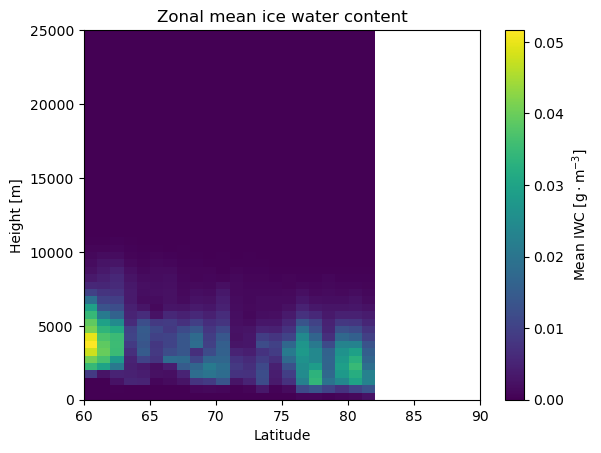

In [32]:
fig, ax = plt.subplots(1, 1)

img = ax.imshow(
    iwc_zonal.statistic, origin="lower", aspect="auto", 
    extent=[lat_bins[0], lat_bins[-1], height_bins[0], height_bins[-1]], 
)
ax.set_title("Zonal mean ice water content")
ax.set_xlabel("Latitude")
ax.set_ylabel("Height [m]")

plt.colorbar(img, ax=ax, label="Mean IWC [$\mathrm{g} \cdot \mathrm{m}^{-3}$]")